### --- Day 3: No Matter How You Slice It ---

The Elves managed to locate the chimney-squeeze prototype fabric for Santa's suit (thanks to someone who helpfully wrote its box IDs on the wall of the warehouse in the middle of the night). Unfortunately, anomalies are still affecting them - nobody can even agree on how to cut the fabric.

The whole piece of fabric they're working on is a very large square - at least 1000 inches on each side.

Each Elf has made a claim about which area of fabric would be ideal for Santa's suit. All claims have an ID and consist of a single rectangle with edges parallel to the edges of the fabric. Each claim's rectangle is defined as follows:

- The number of inches between the left edge of the fabric and the left edge of the rectangle.
- The number of inches between the top edge of the fabric and the top edge of the rectangle.
- The width of the rectangle in inches.
- The height of the rectangle in inches.

A claim like #123 @ 3,2: 5x4 means that claim ID 123 specifies a rectangle 3 inches from the left edge, 2 inches from the top edge, 5 inches wide, and 4 inches tall. Visually, it claims the square inches of fabric represented by # (and ignores the square inches of fabric represented by .) in the diagram below:

```
...........
...........
...#####...
...#####...
...#####...
...#####...
...........
...........
...........
```


The problem is that many of the claims overlap, causing two or more claims to cover part of the same areas. For example, consider the following claims:

```
#1 @ 1,3: 4x4
#2 @ 3,1: 4x4
#3 @ 5,5: 2x2
```

Visually, these claim the following areas:

```
........
...2222.
...2222.
.11XX22.
.11XX22.
.111133.
.111133.
........
```

The four square inches marked with X are claimed by both 1 and 2. (Claim 3, while adjacent to the others, does not overlap either of them.)

If the Elves all proceed with their own plans, none of them will have enough fabric. How many square inches of fabric are within two or more claims?

In [1]:
%matplotlib inline
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

LINE_PATTERN = re.compile(r"""\#(\d+)\ \@\ (\d+),(\d+)\:\ (\d+)x(\d+)""", re.UNICODE)

def parse_input(text):
    lines = [l.strip() for l in text.splitlines()]
    regexes = [LINE_PATTERN.match(i) for i in lines]
    data = [map(int, r.groups()) for r in regexes]
    return pd.DataFrame(data, columns=["id", "x", "y", "w", "h"]).set_index("id")

parse_input(r"""#1 @ 1,3: 4x4
#2 @ 3,1: 4x4
#3 @ 5,5: 2x2""")

,x,y,w,h
id,,,,
1,1,3,4,4
2,3,1,4,4
3,5,5,2,2


In [2]:
with open("inputs/03/input.txt", "r") as fp:
    raw_input = fp.read()
df = parse_input(raw_input)
df.head()

,x,y,w,h
id,,,,
1,808,550,12,22
2,486,680,13,15
3,119,619,22,27
4,885,666,12,21
5,744,975,27,24


In [3]:
w_max = (df.x + df.w).max()
h_max = (df.y + df.h).max()
tensor = np.zeros((len(df), w_max, h_max), dtype=np.uint8)
for i, row in enumerate(df.itertuples()):
    tensor[i, row.x:row.x+row.w, row.y:row.y+row.h] = True

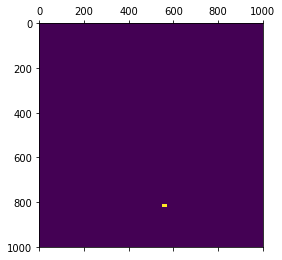

In [4]:
plt.matshow(tensor[0])

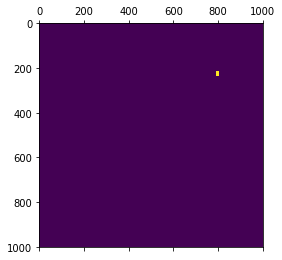

In [5]:
plt.matshow(tensor[100])

### Part 1

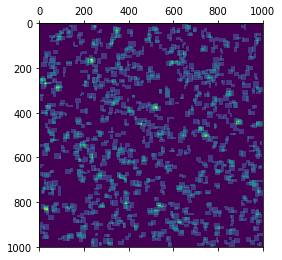

In [6]:
result = np.sum(tensor, axis=0)
plt.matshow(result)

In [7]:
conflict_mask = (result > 1)
conflict_mask.sum()

105231

### Part 2

In [8]:
ok_mask = ~conflict_mask
for i, t in enumerate(tensor):
    if ok_mask[t.astype(np.bool)].all():
        print(df.index.values[i], t)
        break

164 [[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


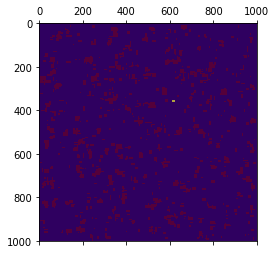

In [15]:
fig, ax = plt.subplots()

ax.matshow(tensor[i], cmap="viridis")
ax.matshow(ok_mask, cmap="jet_r", alpha=0.3)